In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os
import warnings
warnings.filterwarnings("ignore")

In [4]:
data_path = os.path.join(os.path.dirname(os.getcwd()), "Data", "features.csv")
data = pd.read_csv(data_path)

In [5]:
data.head()

,housing_median_age,population,median_income,ocean_proximity,median_house_value,population_per_households,rooms_per_household,bed_rooms_per_household,population_per_bedrooms,rooms_per_bedrooms
0,41,322.0,8.3252,Coastal,452600,2.555556,6.984127,1.023810,2.496124,6.821705
1,21,2401.0,8.3014,Coastal,358500,2.109842,6.238137,0.971880,2.170886,6.418626
2,52,496.0,7.2574,Coastal,352100,2.802260,8.288136,1.073446,2.610526,7.721053
3,52,558.0,5.6431,Coastal,341300,2.547945,5.817352,1.073059,2.374468,5.421277
4,52,565.0,3.8462,Coastal,342200,2.181467,6.281853,1.081081,2.017857,5.810714


In [6]:
data.shape

(20640, 10)

Transform features

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

In [13]:
def Tranform_features(dataframe, target):
    df = dataframe.drop([target], axis =1)

    # select numerical and categorical features
    numerical_features = df.select_dtypes(exclude = 'object').columns
    categorical_features = df.select_dtypes(include = 'object').columns

    # define transfromers
    numerical_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(drop = 'if_binary')

    #create pipeline
    pipeline = ColumnTransformer(
        [
        ("Standard scaler", numerical_transformer, numerical_features),
        ("OneHotEncoder", categorical_transformer, categorical_features)
        ]
    )

    # apply transformation on the data
    array = pipeline.fit_transform(df)

    #convert to dataframe
    transfomed_df  =pd.DataFrame(array)

    #merge target feature
    transfomed_df[target] = dataframe[target]

    return transfomed_df

In [14]:
transformed_df = Tranform_features(data, "median_house_value")

In [15]:
transformed_df.head()

,0,1,2,3,4,5,6,7,8,median_house_value
0,0.982143,-1.175264,2.612122,-0.065232,0.636043,-0.148062,-0.049307,1.503619,0.0,452600
1,-0.607019,1.119959,2.598308,-0.126180,0.332458,-0.248375,-0.091709,1.173069,0.0,358500
2,1.856182,-0.983167,1.992344,-0.031497,1.166718,-0.052177,-0.034393,2.241139,0.0,352100
3,1.856182,-0.914719,1.055362,-0.066272,0.161217,-0.052924,-0.065168,0.355181,0.0,341300
4,1.856182,-0.906991,0.012395,-0.116386,0.350248,-0.037428,-0.111659,0.674544,0.0,342200


In [16]:
transformed_df.shape[1]

10

Apply PCA

In [17]:
def apply_pca(dataframe, target):
    df = dataframe.drop([target], axis =1)
    num_features = df.shape[1]

    #initialize pca
    pca = PCA(n_components=num_features, random_state=360)

    #fit pca
    pca_array = pca.fit_transform(df)
    pca_df = pd.DataFrame(data= pca_array)
    pca_df[target] = dataframe[target]

    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    # create the scree plot
    plt.figure(figsize = (8,6))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker = 'o', linestyle = '-')
    plt.title('Scree Plot of Cumulative Explained Variance')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid()
    plt.show()

    return pca_df

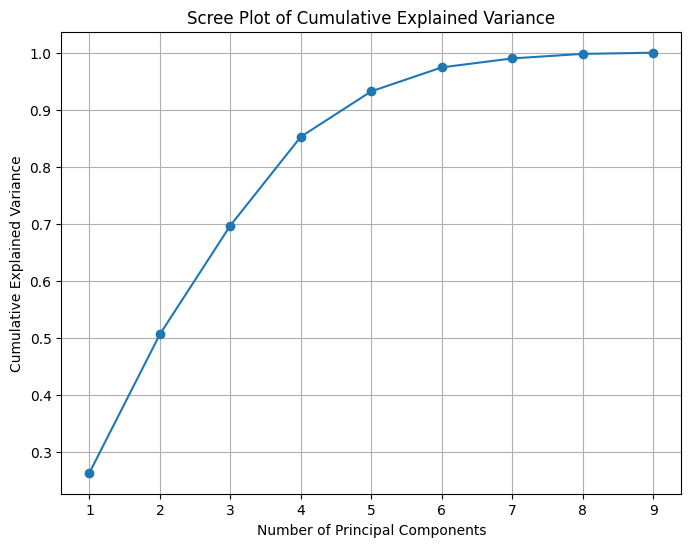

In [18]:
pca_df  =apply_pca(transformed_df, "median_house_value")

In [19]:
pca_df.head()

,0,1,2,3,4,5,6,7,8,median_house_value
0,2.218409,0.147544,-1.137919,-2.216777,0.371704,0.723039,0.380752,-0.077233,-0.000662,452600
1,2.072460,0.339149,-1.950284,0.440497,0.818440,0.899577,0.395716,-0.060965,0.019304,358500
2,2.439004,0.169504,-0.812763,-2.658655,1.034931,-0.302657,-0.036119,-0.008959,-0.024863,352100
3,0.428072,-0.116498,-0.085392,-2.127372,0.869542,0.339143,0.229363,-0.082658,-0.002499,341300
4,0.200498,-0.255207,0.285539,-1.983047,0.724319,-0.481809,-0.310887,0.035746,-0.011931,342200


In [20]:
pca_df = pca_df.drop(pca_df.columns[6:9],axis = 1)

In [21]:
pca_df.head()

,0,1,2,3,4,5,median_house_value
0,2.218409,0.147544,-1.137919,-2.216777,0.371704,0.723039,452600
1,2.072460,0.339149,-1.950284,0.440497,0.818440,0.899577,358500
2,2.439004,0.169504,-0.812763,-2.658655,1.034931,-0.302657,352100
3,0.428072,-0.116498,-0.085392,-2.127372,0.869542,0.339143,341300
4,0.200498,-0.255207,0.285539,-1.983047,0.724319,-0.481809,342200


In [22]:
def plot_corr(df):
    corr_matrix = df.corr()

    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(df.corr(), dtype=bool))
    sns.heatmap(corr_matrix, cmap = "viridis", annot = True, fmt = ".2f", mask = mask)
    plt.title("correlation for numerical features")
    plt.show()

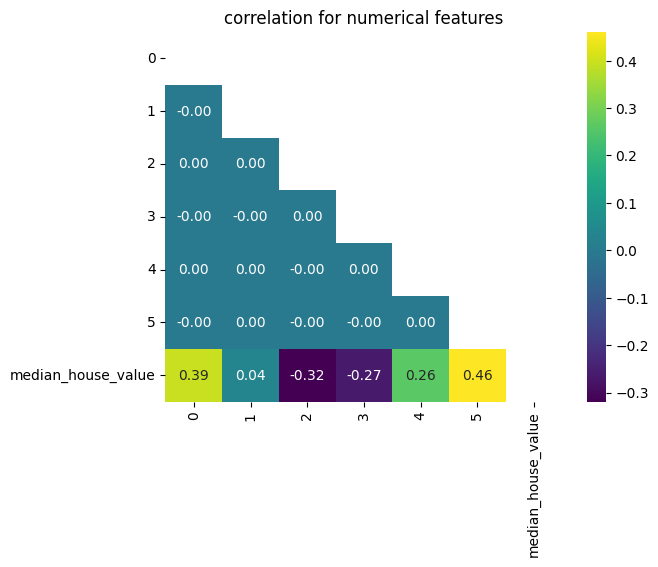

In [23]:
plot_corr(pca_df)

# Modeling

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
Train_df, Test_df = train_test_split(pca_df, test_size = 0.2, random_state=360)

In [26]:
Train_df, Test_df = Train_df.reset_index(drop=True), Test_df.reset_index(drop = True)

In [27]:
Train_df.shape, Test_df.shape

((16512, 7), (4128, 7))

Create Baseline model

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [29]:
def cross_validate_regression_models(df, target, cv =3):
    X = df.drop([target], axis = 1)
    y = df[target]

    models = {
        'Linear Regression': LinearRegression(),
        'Lasso': Lasso(),
        'Ridge': Ridge(),
        'Decision Tree': DecisionTreeRegressor(),
        'Random Forest': RandomForestRegressor()
    }
    results = {}

    for name, model in models.items():
        scores_rmse = cross_val_score(model,X, y, cv= cv, scoring = 'neg_root_mean_squared_error')
        scores_mae = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error')
        scores_r2 = cross_val_score(model, X, y, cv=cv, scoring='r2')

        rmse_mean = -scores_rmse.mean()
        mae_mean = -scores_mae.mean()
        r2_mean = scores_r2.mean()

        print(f"reult for {name}")
        print(f"RMSE: {rmse_mean}, MAE: {mae_mean}, R-squared: {r2_mean}")

        results[name] = {"RMSE": rmse_mean, "MAE": mae_mean, "R-squred":r2_mean}

    return pd.DataFrame(results).T


In [30]:
Train_df

,0,1,2,3,4,5,median_house_value
0,0.329882,-0.146088,-0.185793,-0.292456,-0.208890,-0.500391,181400
1,-0.738677,-0.274944,0.031799,0.389751,-0.794240,1.410600,238900
2,0.830108,0.361361,-0.706215,1.310852,-0.067290,-0.382307,164800
3,-0.031132,0.226866,-0.435291,-0.248987,0.667356,0.164928,173600
4,-2.791851,0.040000,0.708036,0.452605,2.193852,0.202237,243800
...,...,...,...,...,...,...,...
16507,0.021606,0.222923,-0.405818,3.112330,1.023934,-1.007944,65600
16508,0.991679,0.048853,-0.470601,-1.803685,0.514011,-0.679719,318500
16509,-0.317250,0.036268,0.118501,0.003526,-0.259234,-0.308022,123400
16510,-1.018979,-0.121004,0.600108,0.016578,-0.404633,-0.706660,55500


In [31]:
result = cross_validate_regression_models(Train_df, "median_house_value")

reult for Linear Regression
RMSE: 73102.84815927975, MAE: 53224.484751667864, R-squared: 0.6034602163704047
reult for Lasso
RMSE: 73102.87322940816, MAE: 53224.567477734265, R-squared: 0.6034599253290677
reult for Ridge
RMSE: 73102.68942005721, MAE: 53225.03453544271, R-squared: 0.6034617837398372
reult for Decision Tree
RMSE: 89328.7352649098, MAE: 61543.437560562015, R-squared: 0.4104978952845319
reult for Random Forest
RMSE: 63276.20718469783, MAE: 44844.66965479651, R-squared: 0.7039510155320222


In [32]:
result

,RMSE,MAE,R-squred
Linear Regression,73102.848159,53224.484752,0.603460
Lasso,73102.873229,53224.567478,0.603460
Ridge,73102.689420,53225.034535,0.603462
Decision Tree,89328.735265,61543.437561,0.410498
Random Forest,63276.207185,44844.669655,0.703951


**interpretation**

our target feature has a minimum of 14,999 and max of 500,000. A standard deviation of 115,395.

our best baseline model has 

    - RMSE: 63,127
    This means that, on average, your model's predictions are off by approximately 13% of the range of your target variable.
 
    - R_squared:0.70
    This means that your model explains approximately 70% of the variance in the target variable





Improve baseline model

In [33]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [34]:
def tune_model(df, target):
    X_train = df.drop([target], axis =1)
    y_train = df[target]

    param_dist = {
    'n_estimators': randint(50, 150),  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'max_depth': randint(10, 50),  # Maximum depth of the tree
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20),  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}
    
    # Instantiate the Random Fores Regressor
    rf = RandomForestRegressor()

    random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,n_iter=10, cv =5, random_state=350)

    random_search.fit(X_train, y_train)

    best_param = random_search.best_params_
    best_score = random_search.best_score_

    return best_param, best_score

In [35]:
best_param, best_score = tune_model(Train_df, "median_house_value")

In [36]:
best_score

0.7037650071277957

In [37]:
best_param

{'bootstrap': True,
 'max_depth': 17,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 107}

In [38]:
def train_final_model(train, test, target, param):

    X_train = train.drop([target], axis =1)
    y_train = train[target]

    X_test = test.drop([target], axis =1)
    y_test = test[target]

    rf = RandomForestRegressor(**param)
    model = rf.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #calculate RMSE for train and test
    train_rsme = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # calculte R2
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"train RMSE: {train_rsme}, test RMSE: {test_rmse}\n"
          f"train_r2: {train_r2}, test_r2: {test_r2}")


In [39]:
train_final_model(Train_df, Test_df, "median_house_value", best_param)

train RMSE: 45050.74460274498, test RMSE: 59807.592543993254
train_r2: 0.8495148813388165, test_r2: 0.7162996100938054
